## Advanced Lane Finding Project

### 03 Perspective Transform

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard image.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* **Apply a perspective transform to rectify binary image ("birds-eye view").**
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import cv2
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
# Load test images.
test_images = list(map(lambda filename: (filename, cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)), glob.glob('test_images/straight*.jpg')))

In [3]:
# Display images on a [cols, rows] subplot grid
def show_images(images, cols = 4, rows = 2, figsize=(25,6), cmap = None):
    f, axes = plt.subplots(rows, cols, figsize=figsize)
    f.tight_layout()
    plt.subplots_adjust(left=0., right=1, top=1.4, bottom=0.)
    
    indexes = range(cols * rows)
    
    for ax, index in zip(axes.flat, indexes):
        if index < len(images):
            filename, image = images[index]
            if cmap == None:
                ax.imshow(image)
            else:
                ax.imshow(image, cmap=cmap)
            ax.set_title(filename, fontsize=25)

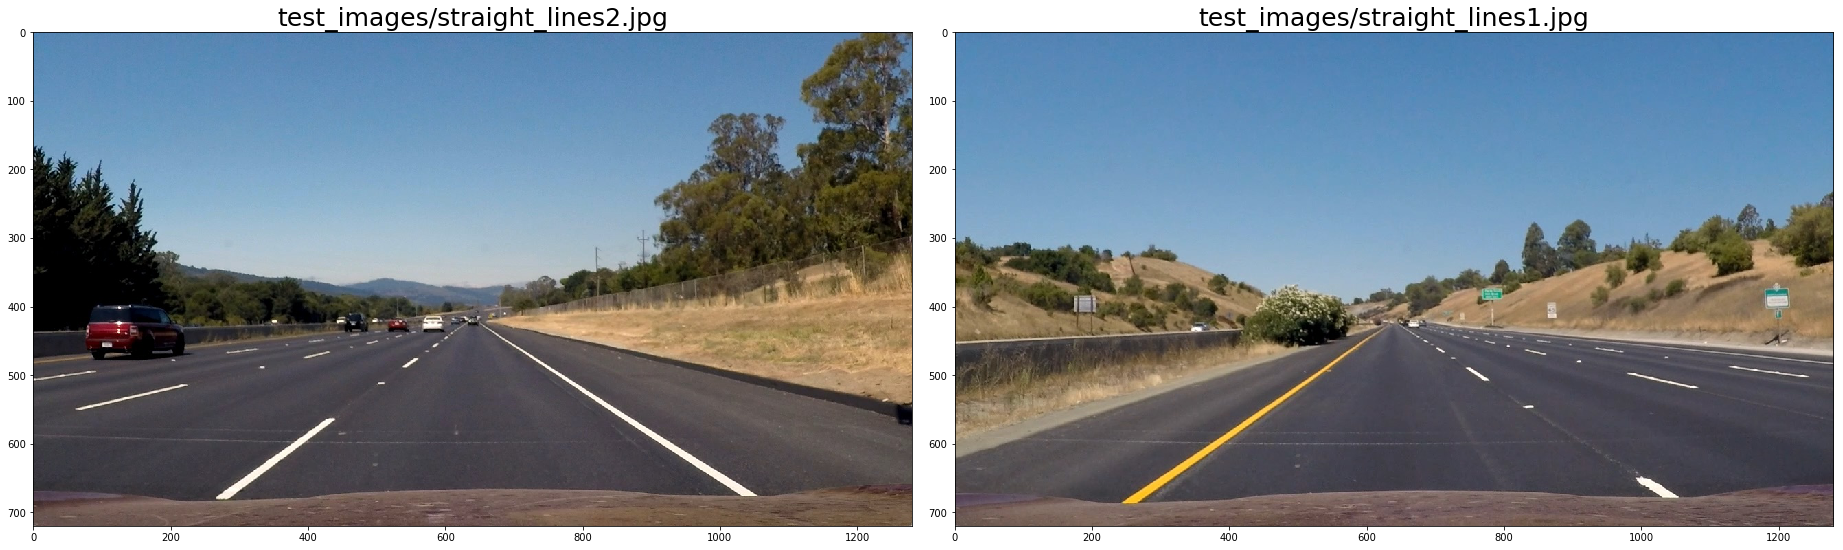

In [4]:
# Show test images
show_images(test_images, 2, 1, (25,6))

In [5]:
# Loading camera calibration (calculated in 01_Camera_Calibartion.ipynb)
camera_cal = pickle.load(open('camera_cal/camera_calibration.p', 'rb'))
mtx, dist = map(camera_cal.get, ('mtx', 'dist'))

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [6]:
test_images_undistort = list(map(lambda img: (img[0], undistort(img[1])), test_images))

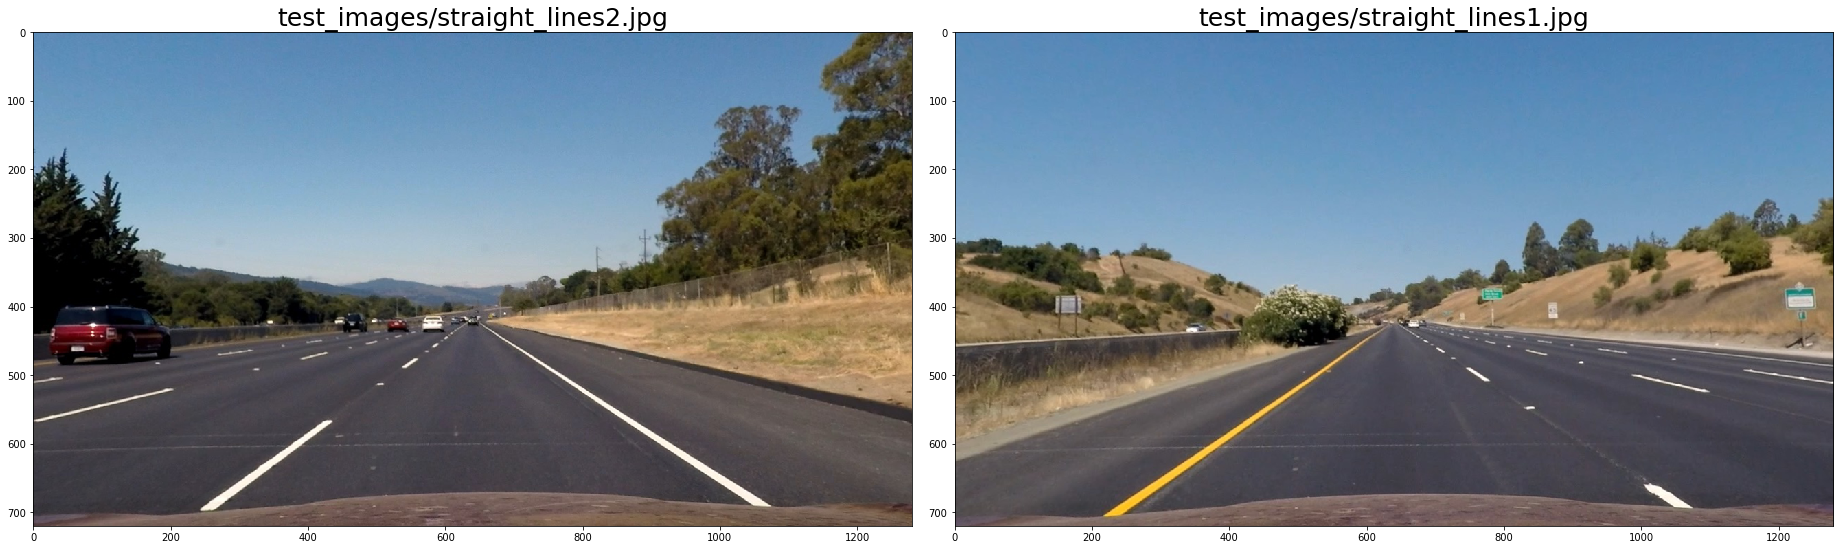

In [7]:
show_images(test_images_undistort, 2, 1, (25,6))

In [8]:
y_size, x_size, _ = test_images[0][1].shape

# print(x_size)
# print(y_size)

src = np.float32(
    [[x_size / 2 - 55, y_size / 2 + 100],
    [x_size / 6 - 10, y_size],
    [x_size * 5 / 6 + 60, y_size],
    [x_size / 2 + 55, y_size / 2 + 100]])

dst = np.float32(
    [[(x_size / 4), 0],
    [(x_size / 4), y_size],
    [(x_size * 3 / 4), y_size],
    [(x_size * 3 / 4), 0]])

print('src=',src)
print('dst=',dst)

def draw_lines(img):
    img_copy = img.copy()
    color = [255, 0, 0]
    w = 3
    cv2.line(img_copy, (src[1][0], src[1][1]), (src[0][0], src[0][1]), color, w)
    cv2.line(img_copy, (src[0][0], src[0][1]), (src[3][0], src[3][1]), color, w)
    cv2.line(img_copy, (src[3][0], src[3][1]), (src[2][0], src[2][1]), color, w)
    cv2.line(img_copy, (src[2][0], src[2][1]), (src[1][0], src[1][1]), color, w)
    
    return img_copy

src= [[ 585.       460.     ]
 [ 203.33333  720.     ]
 [1126.6666   720.     ]
 [ 695.       460.     ]]
dst= [[320.   0.]
 [320. 720.]
 [960. 720.]
 [960.   0.]]


In [9]:
test_images_lines = list(map(lambda img: (img[0], draw_lines(img[1])), test_images_undistort))

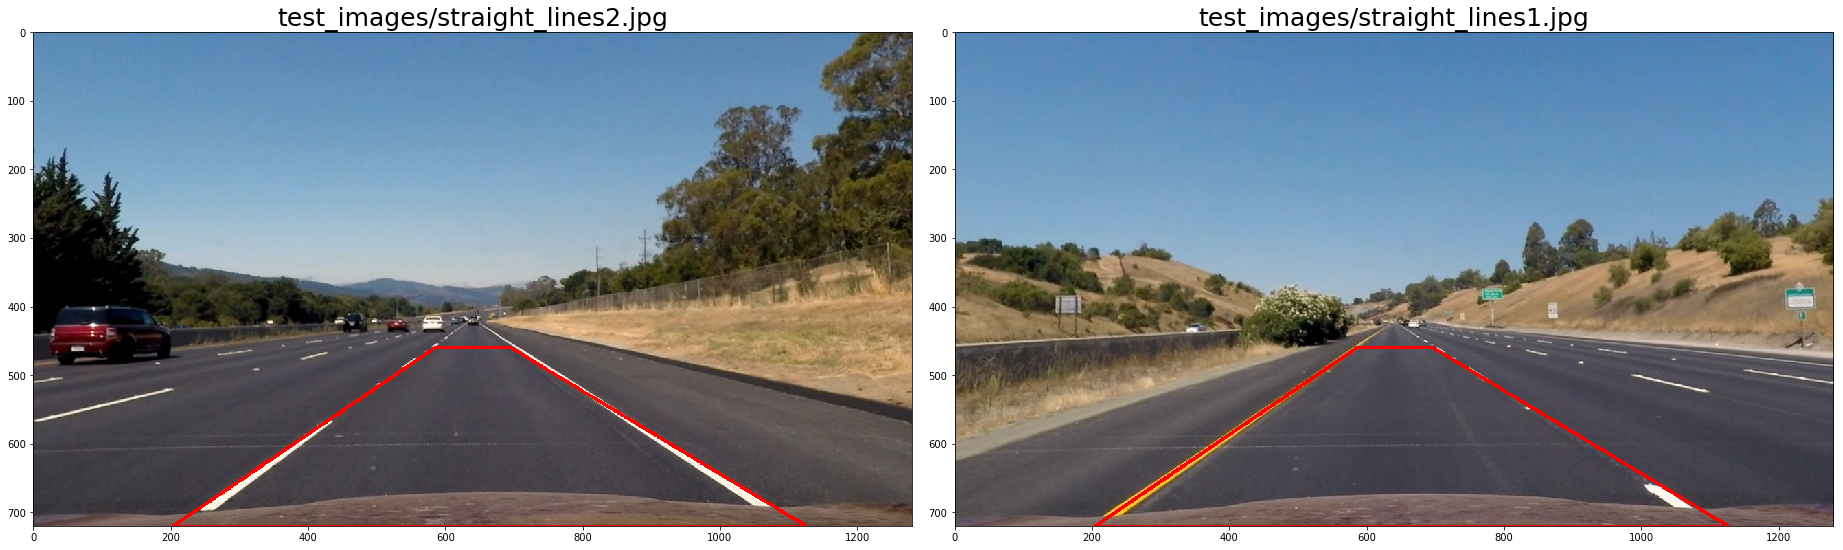

In [10]:
show_images(test_images_lines, 2, 1, (25,6))

In [11]:
def warper(img, src, dst):

    # Compute and apply perpective transform
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_NEAREST)  # keep same size as input image

    return warped

In [12]:
test_images_warper = list(map(lambda img: (img[0], warper(img[1], src, dst)), test_images_undistort))

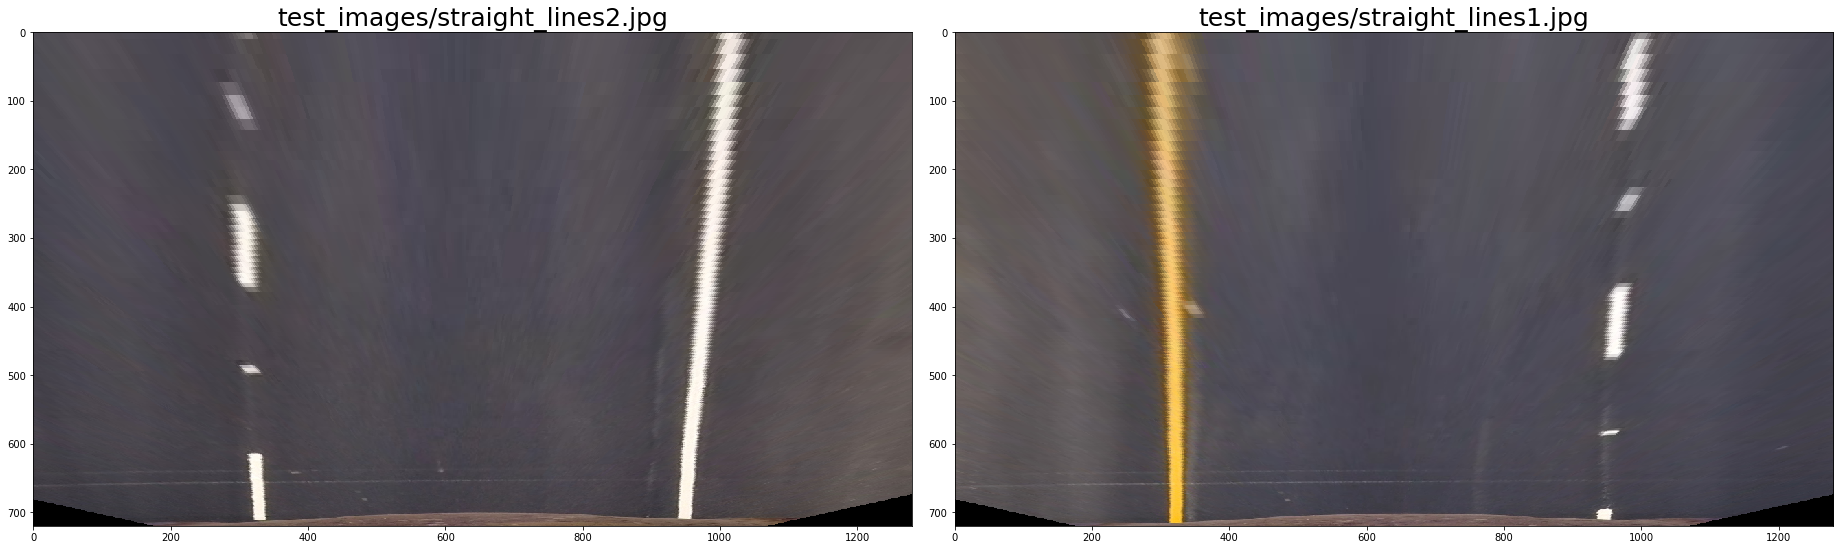

In [13]:
show_images(test_images_warper, 2, 1, (25,6))